<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

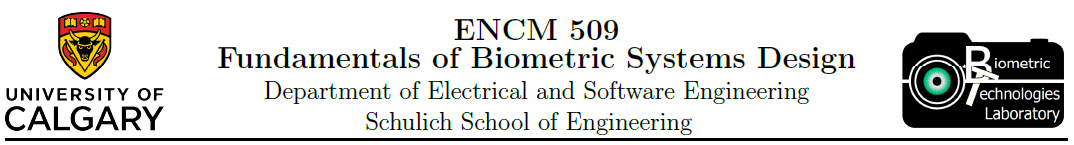

<center>
    <h1>Laboratory Experiment #3</h1>
    <h2>Biometric-based verification: Signature</h2>
</center>

## Introduction
The purpose of this lab is to learn how to handle and process geniune and forged signature of one individual using Python data input and analysis. From Lab 2 we get to use extracted features for matches (coord, time, and prs). Now with these extracted values we can apply certain classification algorithms as mentioned such as EM and GMM.

## Importing Packages

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

- **Exercise 1** (4 marks): Create  your own data (three sets of signatures recorded as `.csv` files), or the data provided on D2L. Use the sample Notebook file `Lab3-SigVerif GMM.ipynb`  to classify set 1 (genuine) and set 2 (impostor). Follow the instructions described in  Section 2.2 and repeat this process for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. Include the 4 sets of distribution plots (figures) for your report. Include a brief analysis of how varying the above parameters influence  the classification results.
		
	 Plot the matching scores' PDFs of the *authentic* (genuine) and *forged* (impostor) sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Use two other different sets of parameters, see the difference of plotting the pair of curves (authentic and impostor) together and separately. 

## Loading Signatures

In [5]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# this is the place where the folders "genuine" and "impostor" are
# change it to point to your dataset.
base_dir = 'signature_samples/biometrics/'
# note that if your dataset folder is in the same folder as the notebook, 
# you don't need the "../" only "./"
#base_dir = './signature_samples/biometrics/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_impostor = base_dir + 'impostor/'

# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

In [6]:
print('Size of the "auth_lst" vector: %d' % (len(auth_lst)))
print('Size of the "imp_lst" vector: %d' % (len(imp_lst)))

Size of the "auth_lst" vector: 30
Size of the "imp_lst" vector: 30


## Classification: selecting subset to train

In [7]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 24 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [8]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 24 signatures from the set,
and the number of Gaussian mixture components is 40


### Training with the Gaussian Mixture Model

In [9]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [10]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

24: -17.4025
25: -18.0883
26: -17.4843
27: -17.1651
28: -16.1203
29: -17.3074


### Testing with the forged (impostor) data

In [11]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -304.2748
1: -192.7074
2: -204.1380
3: -475.3727
4: -357.9990
5: -313.2996
6: -289.8148
7: -331.9791
8: -371.7639
9: -209.6525
10: -175.3002
11: -304.1031
12: -325.5541
13: -264.7899
14: -590.2441
15: -316.2694
16: -195.4608
17: -314.7834
18: -305.1499
19: -767.8480
20: -219.0875
21: -362.2300
22: -195.2748
23: -256.1050
24: -184.0419
25: -174.1474
26: -189.8612
27: -253.4533
28: -199.7415
29: -633.9136


### Calculating mean and std of the scores

In [12]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.2613
Average of forgery scores: -309.2787


### Probability Density Function (PDF) for forged and authentic data

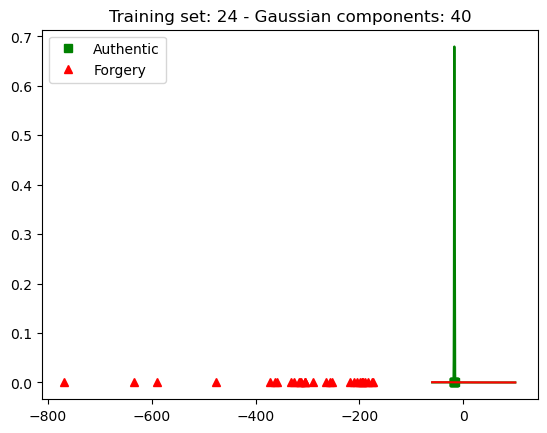

In [13]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd) #authentic
fProb = norm.pdf(x, loc=fMu, scale=fStd) #forged
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend()
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images in one solution:

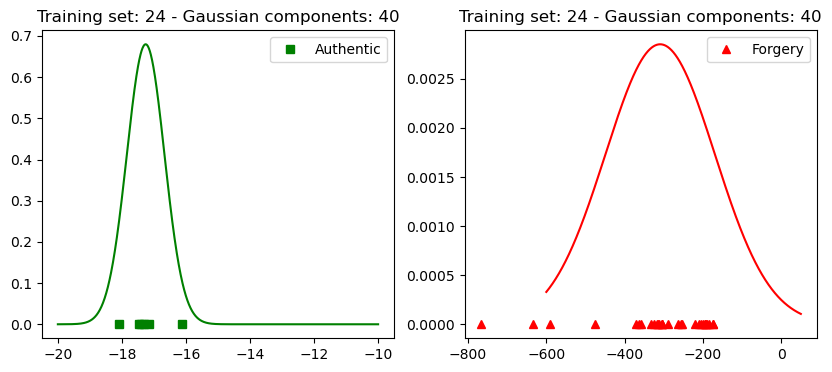

In [14]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

### Set 2 with 24 training patterns and 60 gaussian mixture components

In [15]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 24 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 60

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [16]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 24 signatures from the set,
and the number of Gaussian mixture components is 60


### Training with the Gaussian Mixture Model

In [17]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [18]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

24: -17.5321
25: -18.1999
26: -17.3875
27: -17.5370
28: -16.3237
29: -17.4724


### Testing with the forged (impostor) data

In [19]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -153.4914
1: -97.0777
2: -103.0712
3: -248.8304
4: -183.6957
5: -165.1935
6: -154.7950
7: -175.8955
8: -205.6457
9: -113.9049
10: -107.7552
11: -168.1124
12: -180.1478
13: -146.9906
14: -301.7672
15: -160.5266
16: -115.8920
17: -166.8136
18: -159.2696
19: -386.4147
20: -118.0313
21: -191.1532
22: -103.8395
23: -136.6827
24: -100.8334
25: -92.7160
26: -104.3050
27: -126.1719
28: -112.0473
29: -318.2644


### Calculating mean and std of the scores

In [20]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.4088
Average of forgery scores: -163.3112


### Probability Density Function (PDF) for forged and authentic data

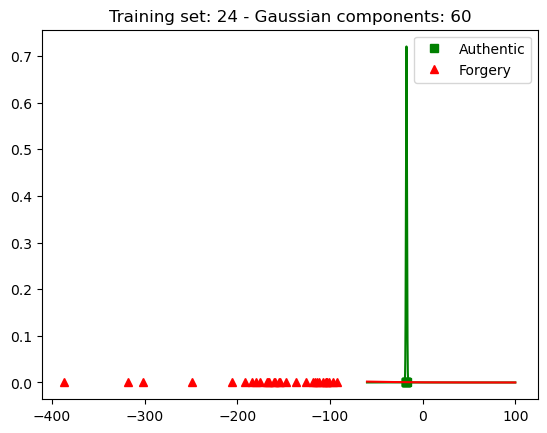

In [21]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

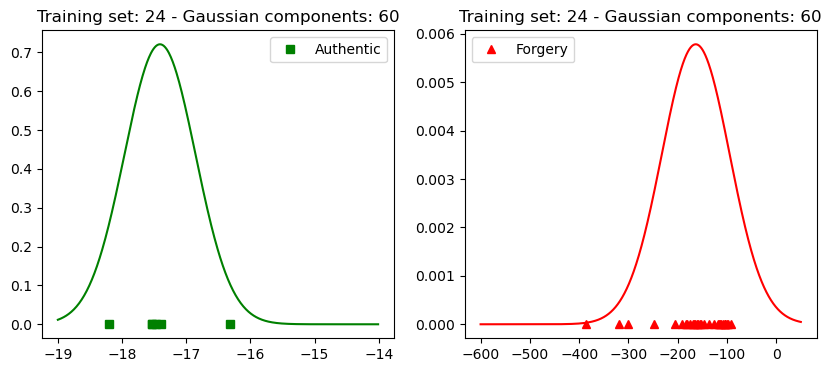

In [22]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-19, -14, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

### Set 3 with 15 training patterns and 40 gaussian mixture components

In [23]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 15 # 50% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [24]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 15 signatures from the set,
and the number of Gaussian mixture components is 40


### Training with the Gaussian Mixture Model

In [25]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [26]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

15: -16.7231
16: -17.9524
17: -17.6259
18: -18.1169
19: -19.3055
20: -18.7216
21: -18.1132
22: -17.3293
23: -18.1984
24: -17.9575
25: -19.2355
26: -18.3828
27: -17.8170
28: -16.7983
29: -17.9729


### Testing with the forged (impostor) data

In [27]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -333.6224
1: -203.6232
2: -214.3089
3: -546.6491
4: -402.0279
5: -346.6442
6: -318.7154
7: -370.2768
8: -422.7335
9: -225.6546
10: -187.6266
11: -336.5219
12: -366.4968
13: -292.9380
14: -685.9474
15: -347.3850
16: -208.1220
17: -347.4875
18: -335.5617
19: -906.5243
20: -235.3475
21: -408.9243
22: -206.5275
23: -273.0063
24: -194.6888
25: -184.8471
26: -201.6521
27: -272.3502
28: -212.5219
29: -739.1868


### Calculating mean and std of the scores

In [28]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -18.0167
Average of forgery scores: -344.2640


### Probability Density Function (PDF) for forged and authentic data

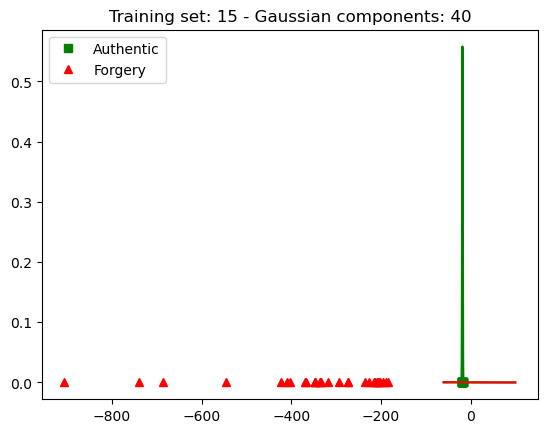

In [29]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

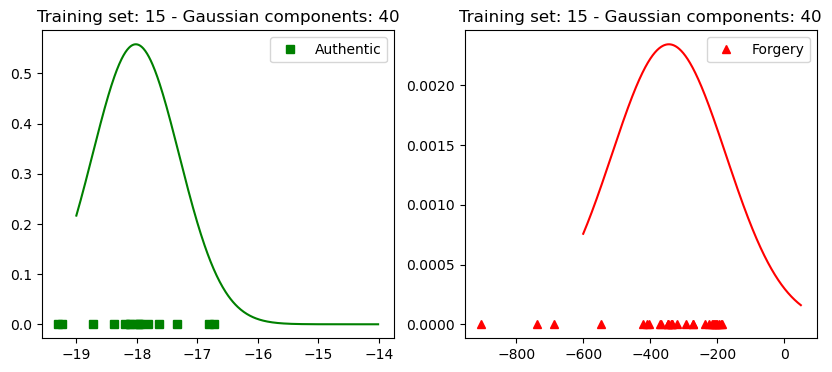

In [30]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-19, -14, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

### Set 4 with 15 training patterns and 60 gaussian mixture components

In [31]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 15 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 60

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [32]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 15 signatures from the set,
and the number of Gaussian mixture components is 60


### Training with the Gaussian Mixture Model

In [33]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [34]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

15: -16.8864
16: -18.6476
17: -17.9464
18: -18.8556
19: -20.2839
20: -19.1326
21: -18.4347
22: -18.2496
23: -18.9536
24: -18.6410
25: -19.8243
26: -18.6728
27: -18.1298
28: -17.1703
29: -18.7269


### Testing with the forged (impostor) data

In [35]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -768.2339
1: -434.1926
2: -466.6993
3: -1443.7429
4: -1011.5325
5: -846.8628
6: -752.0601
7: -887.4334
8: -1034.5140
9: -502.7831
10: -374.2644
11: -803.8481
12: -866.6189
13: -669.3181
14: -1843.6424
15: -826.2251
16: -420.7733
17: -811.5121
18: -777.5764
19: -2509.7025
20: -509.2917
21: -1005.2935
22: -435.0033
23: -593.5063
24: -390.9227
25: -374.9199
26: -401.9350
27: -630.1010
28: -440.7800
29: -2014.3487


### Calculating mean and std of the scores

In [36]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -18.5704
Average of forgery scores: -828.2546


### Probability Density Function (PDF) for forged and authentic data

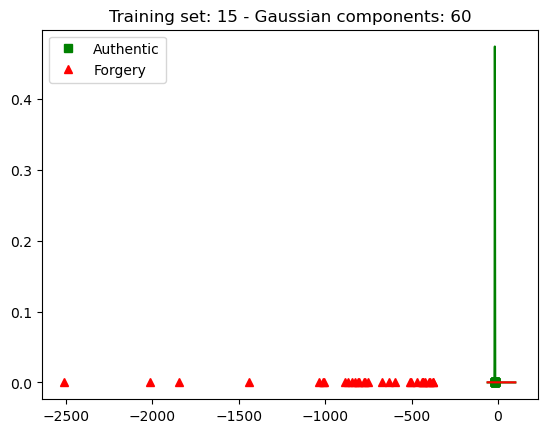

In [37]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

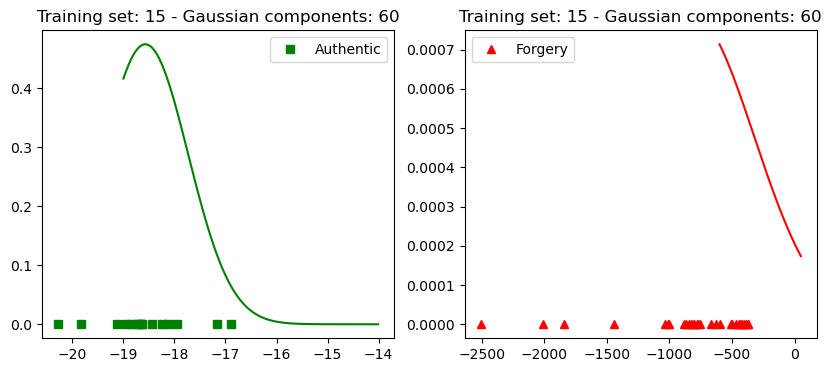

In [38]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-19, -14, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

## Exercise 1 Description

The more Gaussian Components added, the longer the distribution curve gets. More training data sets also gives higher precision and smoother curve.



- **Exercise 2** (4 marks): Consider the genuine set and the second set of impostor signatures that are very different (in shape, length, i.e. a different writing or another person signature). 
	Repeat the process as described  in Exercise 1,  for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. 
	Plot the matching scores' PDFs of the *authentic*  (genuine) and *impostor* sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Compare these results against the results of Exercise 1.

In [39]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# this is the place where the folders "genuine" and "impostor" are
# change it to point to your dataset.
base_dir = 'signature_samples/biometrics/'
# note that if your dataset folder is in the same folder as the notebook, 
# you don't need the "../" only "./"
#base_dir = './signature_samples/biometrics/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_impostor = base_dir + 'CTruong - impostor/'

# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

In [40]:
print('Size of the "auth_lst" vector: %d' % (len(auth_lst)))
print('Size of the "imp_lst" vector: %d' % (len(imp_lst)))

Size of the "auth_lst" vector: 30
Size of the "imp_lst" vector: 30


## Classification: selecting subset to train

In [41]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 24 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [42]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 24 signatures from the set,
and the number of Gaussian mixture components is 40


### Training with the Gaussian Mixture Model

In [43]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [44]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

24: -17.2769
25: -18.0882
26: -17.3342
27: -17.1963
28: -16.1380
29: -17.2140


### Testing with the forged (impostor) data

In [45]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -84.8594
1: -40.0450
2: -47.7627
3: -55.6824
4: -56.1576
5: -66.1335
6: -66.6195
7: -51.4027
8: -68.2982
9: -69.4082
10: -75.7535
11: -72.7251
12: -75.8166
13: -82.3437
14: -64.2209
15: -60.7576
16: -91.0221
17: -76.5937
18: -66.0602
19: -67.1408
20: -64.4386
21: -69.0183
22: -59.6077
23: -56.9730
24: -70.5643
25: -61.7379
26: -61.7379
27: -62.5262
28: -66.5090
29: -82.4418


### Calculating mean and std of the scores

In [46]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.2079
Average of forgery scores: -66.4786


### Probability Density Function (PDF) for forged and authentic data

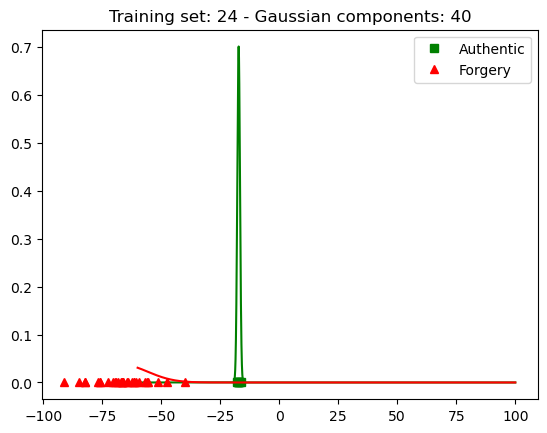

In [47]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

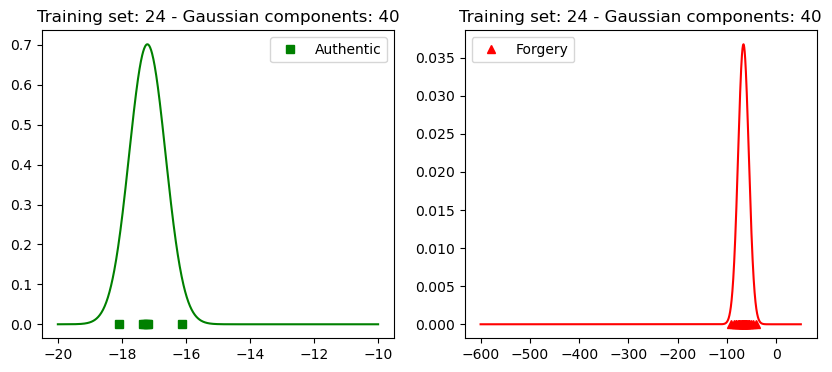

In [48]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

### Set 1 with 24 training patterns and 40 gaussian mixture components

In [49]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 24 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [50]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 24 signatures from the set,
and the number of Gaussian mixture components is 40


### Training with the Gaussian Mixture Model

In [51]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [52]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

24: -17.2989
25: -18.0998
26: -17.4317
27: -17.0694
28: -16.1599
29: -17.2840


### Testing with the forged (impostor) data

In [53]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -99.7438
1: -40.4924
2: -45.5483
3: -55.3057
4: -59.0637
5: -68.0675
6: -69.6524
7: -49.0915
8: -72.2630
9: -69.5895
10: -83.4335
11: -72.8986
12: -77.5055
13: -86.9623
14: -56.6997
15: -63.3398
16: -92.0717
17: -78.5406
18: -62.4042
19: -74.0088
20: -68.5723
21: -72.5850
22: -57.2397
23: -60.8273
24: -74.3228
25: -59.4673
26: -59.4673
27: -67.9101
28: -73.6395
29: -90.2650


### Calculating mean and std of the scores

In [54]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.2239
Average of forgery scores: -68.6993


### Probability Density Function (PDF) for forged and authentic data

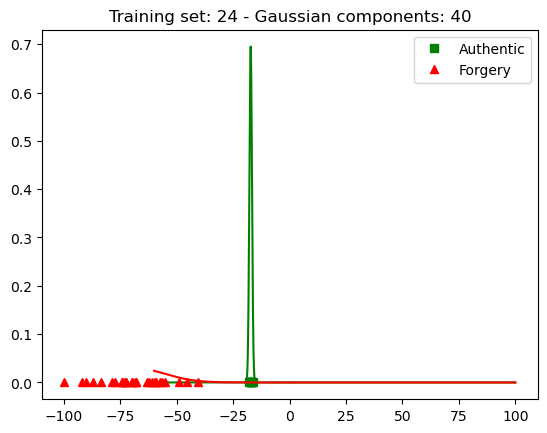

In [55]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

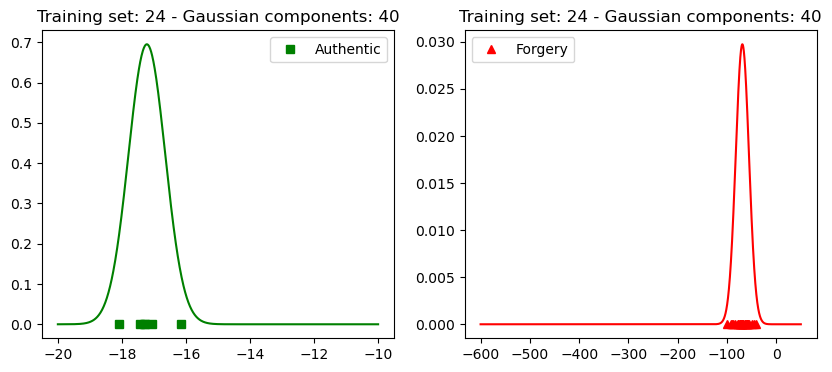

In [56]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

### Set 2 with 24 training patterns and 60 gaussian mixture components

In [57]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 24 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 60

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [58]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 24 signatures from the set,
and the number of Gaussian mixture components is 60


### Training with the Gaussian Mixture Model

In [59]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [60]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

24: -17.5985
25: -18.0420
26: -17.4697
27: -17.2865
28: -16.1968
29: -17.3330


### Testing with the forged (impostor) data

In [61]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -94.9768
1: -43.4415
2: -50.2601
3: -56.8444
4: -64.1594
5: -75.5215
6: -72.7637
7: -56.3146
8: -77.7850
9: -81.4876
10: -89.4465
11: -86.0730
12: -83.1122
13: -94.8372
14: -68.8695
15: -71.3683
16: -109.5941
17: -86.4701
18: -77.8393
19: -85.1935
20: -80.7465
21: -89.0158
22: -69.2549
23: -65.4795
24: -92.3130
25: -64.8250
26: -64.8250
27: -73.3037
28: -84.9583
29: -108.1720


### Calculating mean and std of the scores

In [62]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.3211
Average of forgery scores: -77.3084


### Probability Density Function (PDF) for forged and authentic data

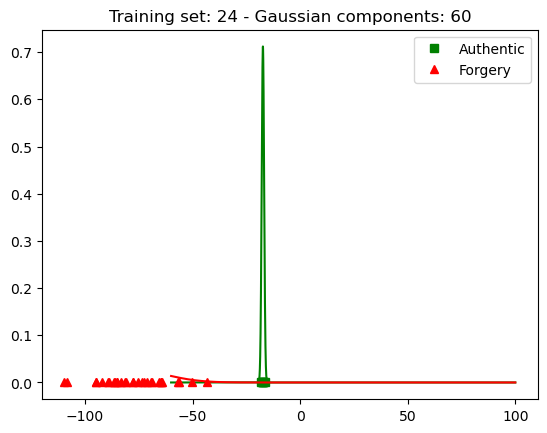

In [63]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

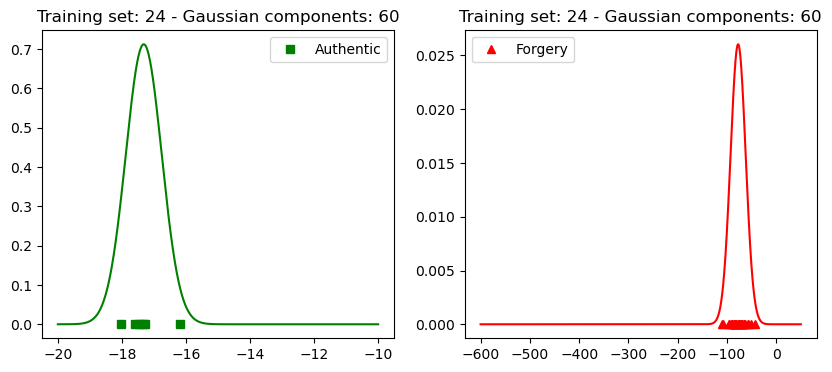

In [64]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

### Set 3 with 15 training patterns and 40 gaussian mixture components

In [65]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 15 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [66]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 15 signatures from the set,
and the number of Gaussian mixture components is 40


### Training with the Gaussian Mixture Model

In [67]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [68]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

15: -16.6173
16: -18.1545
17: -17.7725
18: -18.5835
19: -19.9547
20: -19.2967
21: -18.2218
22: -17.7604
23: -18.7640
24: -18.2846
25: -19.4410
26: -18.6133
27: -17.6695
28: -17.1817
29: -18.3376


### Testing with the forged (impostor) data

In [69]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -111.6903
1: -47.3393
2: -57.0508
3: -66.1317
4: -76.6225
5: -88.3565
6: -90.1913
7: -66.1683
8: -98.1541
9: -88.6161
10: -108.5606
11: -108.6012
12: -93.7103
13: -107.7870
14: -83.3608
15: -82.8597
16: -131.4699
17: -108.4053
18: -91.6836
19: -106.0671
20: -94.9643
21: -104.0986
22: -81.2639
23: -77.0278
24: -108.1006
25: -75.5088
26: -75.5088
27: -87.0564
28: -101.2308
29: -121.3967


### Calculating mean and std of the scores

In [70]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -18.3102
Average of forgery scores: -91.2994


### Probability Density Function (PDF) for forged and authentic data

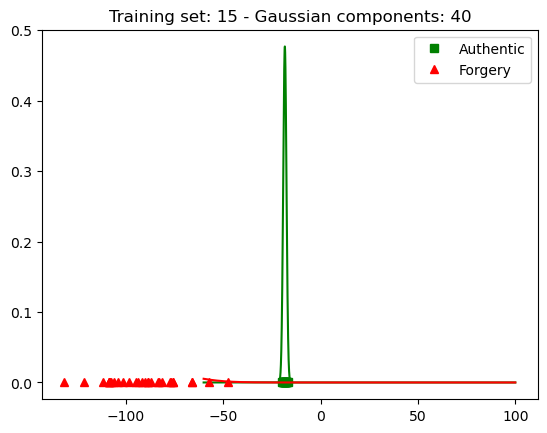

In [71]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

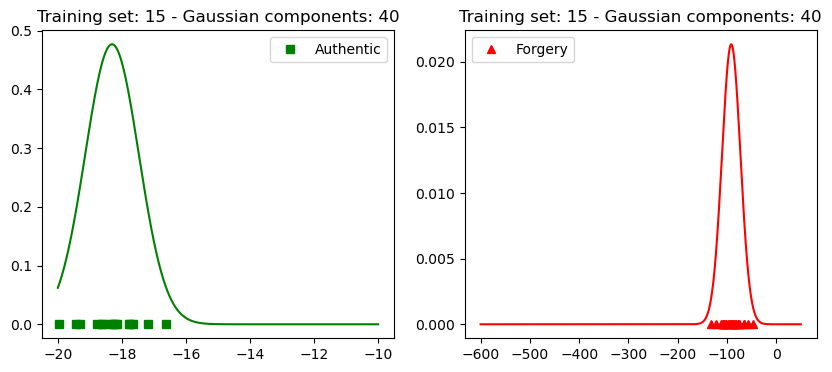

In [72]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

### Set 4 with 15 training patterns and 60 gaussian mixture components

In [73]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 24 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 60

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [74]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 24 signatures from the set,
and the number of Gaussian mixture components is 60


### Training with the Gaussian Mixture Model

In [75]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [76]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

24: -17.4814
25: -18.0373
26: -17.4283
27: -17.2664
28: -16.1747
29: -17.3541


### Testing with the forged (impostor) data

In [77]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -100.2999
1: -47.9898
2: -51.4540
3: -57.5698
4: -63.5534
5: -76.1557
6: -74.6045
7: -57.5882
8: -75.6821
9: -80.9143
10: -89.5642
11: -90.4833
12: -87.0097
13: -94.1091
14: -72.3309
15: -72.1850
16: -103.8566
17: -81.7624
18: -77.1503
19: -82.5837
20: -82.2097
21: -87.9084
22: -68.5768
23: -64.6530
24: -89.9175
25: -66.6655
26: -66.6655
27: -73.7828
28: -81.9759
29: -106.8740


### Calculating mean and std of the scores

In [78]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.2904
Average of forgery scores: -77.5359


### Probability Density Function (PDF) for forged and authentic data

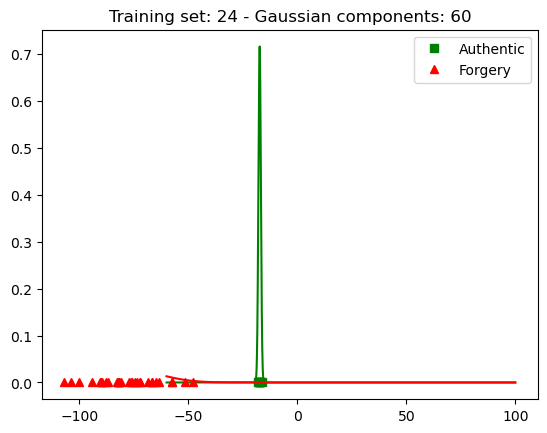

In [79]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

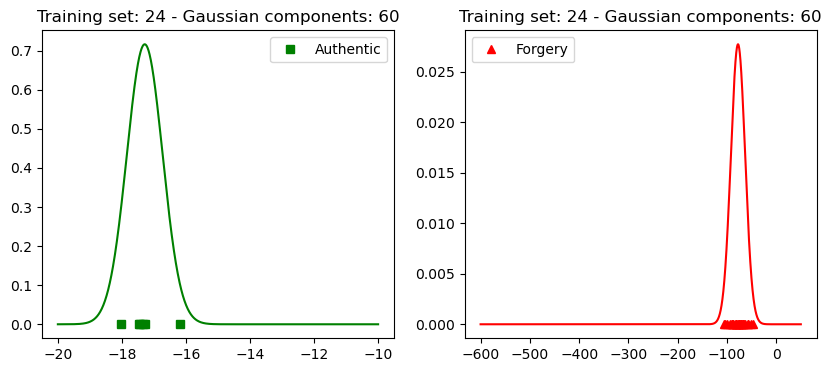

In [80]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

In [81]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 24 # 80% of signatures

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 40

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [82]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 24 signatures from the set,
and the number of Gaussian mixture components is 40


### Training with the Gaussian Mixture Model

In [83]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [84]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

24: -17.3450
25: -18.0071
26: -17.4722
27: -17.1299
28: -16.2147
29: -17.2097


### Testing with the forged (impostor) data

In [85]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -63.3219
1: -37.3803
2: -49.7853
3: -56.5637
4: -69.9769
5: -79.7302
6: -82.4504
7: -55.3434
8: -84.9207
9: -79.3035
10: -98.7827
11: -92.8563
12: -86.6649
13: -99.2328
14: -61.9297
15: -73.3030
16: -115.1210
17: -94.9277
18: -79.7281
19: -91.5693
20: -85.0156
21: -88.3116
22: -71.5901
23: -68.3401
24: -93.2155
25: -65.9243
26: -65.9243
27: -78.3087
28: -88.3335
29: -109.5634


### Calculating mean and std of the scores

In [86]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.2298
Average of forgery scores: -78.9140


### Probability Density Function (PDF) for forged and authentic data

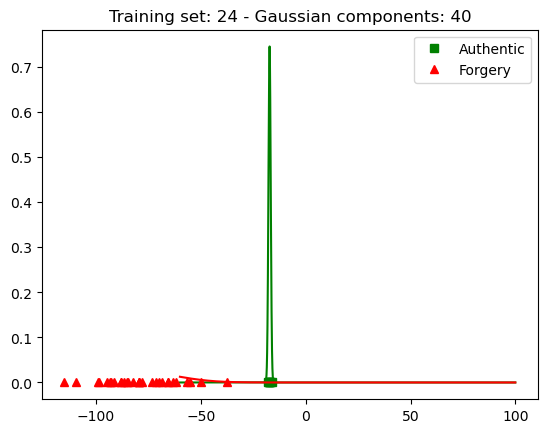

In [87]:
# change this range for your set
x = np.arange(-60, 100, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

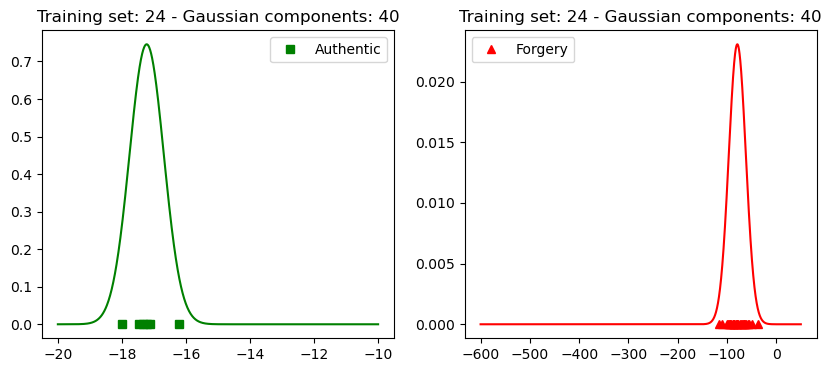

In [88]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-600, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

## Description of Exercise 2. Comparing Exercise 2 results against Exercise 1

The imposter set of the Exercise 2 has a much wider normal distrubution spread ranging from 0 to - 400 whereas the same training set and components in Ex1 only range from 0 to -200

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

**Specific Questions**

A detailed description of each exercise to be included in your report (10 marks total) is given below:

- **Exercise 3** (2 marks): Consider your plots from Exercise 1 or 2. Formulate a hypothesis $H_0$ about the $\mu$ and $\sigma$ of the entire population of the authentic signatures, and analytically test this hypothesis based on your sample (your 10 or more signatures) given the level of the test significance equal to 0.05 ($\alpha=0.05$, level of confidence: $1-\alpha= 0.95$). Now, change the critical values (choose reasonable values) and evaluate the FRR value.  Evaluate your FRR and FAR. You can do the calculations manually, and include in  your report using the Markdown or taking a photo and adding this photo to the notebook (see Lab 1 on Markdown). 

In [165]:
import scipy.stats as st

#create 95% confidence interval for hypothesis
st.t.interval(alpha=0.95, df=len(aScores)-1, loc=np.mean(aScores), scale=st.sem(aScores))

/var/folders/67/g2q944h5495gt9wk60qr8s4r0000gn/T/ipykernel_2505/1753254660.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(aScores)-1, loc=np.mean(aScores), scale=st.sem(aScores))


(-24.3760443650772, -19.28913829766369)